# Web Scraping with Beautiful Soup and Pandas



Web scraping is the process of using bots to extract content and data from a website.

Unlike screen scraping, which only copies pixels displayed onscreen, web scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere.

Web scraping is used in a variety of digital businesses that rely on data harvesting. Legitimate use cases include:

- Search engine bots crawling a site, analyzing its content and then ranking it.
- Price comparison sites deploying bots to auto-fetch prices and product descriptions for allied seller websites.
- Market research companies using scrapers to pull data from forums and social media (e.g., for sentiment analysis).

## I. Making Database From Scratch With Beautiful Soup

There are a number of different packages available for web scraping, and one of the most popular is [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Beautiful Soup parses web content into a Python object and makes the [DOM](https://en.wikipedia.org/wiki/Document_Object_Model) queryable element by element. Used in conjunction with a requests package, it makes web scraping very easy!

---
### Installation of Beautiful Soup (if haven't done so)
In the `bash` terminal or `Anaconda Prompt`,run:
```bash
conda install beautifulsoup4 

or  

pip install beautifulsoup4
```
---

In [1]:
# Standard imports
import pandas as pd

# For web scraping
import requests
import urllib.request
from bs4 import BeautifulSoup

# For performing regex operations
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt


For this kickoff, we'll be scraping the **random functions names and usages** from Python documentation from the website [docs.python.org](https://docs.python.org/).

### Scrape The Data


In [2]:
# Save the URL of the webpage we want to scrape to a variable
url = 'https://docs.python.org/3/library/random.html#module-random'

When web scraping, the first step is to pull down the content of the page into a Python (string) variable. For simpler webscraping tasks you can do this with the `requests` package, which is what we'll use here. For more complex tasks (involving, e.g., webpages with lots of Javascript or other elements that are rendered by the web browser) you may need to use something more advanced, like `urllib` or [Selenium](https://selenium-python.readthedocs.io/index.html).

In [3]:
# Send a get request and assign the response to a variable
response = requests.get(url)

Let's take a look at what we have!

In [4]:
response

<Response [200]>

In [5]:
response.content

b'\n<!DOCTYPE html>\n\n<html>\n  <head>\n    <meta charset="utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta name="generator" content="Docutils 0.17.1: http://docutils.sourceforge.net/" />\n<meta property="og:title" content="random \xe2\x80\x94 Generate pseudo-random numbers" />\n<meta property="og:type" content="website" />\n<meta property="og:url" content="https://docs.python.org/3/library/random.html" />\n<meta property="og:site_name" content="Python documentation" />\n<meta property="og:description" content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For integers, there is uniform selection from a range. For sequences, there is uniform s..." />\n<meta property="og:image" content="https://docs.python.org/3/_static/og-image.png" />\n<meta property="og:image:alt" content="Python documentation" />\n<meta name="description" content="Source code: Lib/random.py This module impleme

That's a lot to look at! It's also pretty unreadable. This is where Beautiful Soup comes in. What Beautiful Soup does is helps us parse the page content properly, into a form that we can more easily use.

In [6]:
# Turn the undecoded content into a Beautiful Soup object and assign it to a variable
soup = BeautifulSoup(response.content)
type(soup)

bs4.BeautifulSoup

**Now let's take a look at this.**

In [7]:
# Check soup variable

soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="Docutils 0.17.1: http://docutils.sourceforge.net/" name="generator"/>
<meta content="random — Generate pseudo-random numbers" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://docs.python.org/3/library/random.html" property="og:url"/>
<meta content="Python documentation" property="og:site_name"/>
<meta content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For integers, there is uniform selection from a range. For sequences, there is uniform s..." property="og:description"/>
<meta content="https://docs.python.org/3/_static/og-image.png" property="og:image"/>
<meta content="Python documentation" property="og:image:alt"/>
<meta content="Source code: Lib/random.py This module implements pseudo-random number generators for various distributions. For i

In [ ]:
# Other way to load the html code using 'urllib.request.urlopen()'

#url = urllib.request.urlopen("https://docs.python.org/3/library/random.html#module-random")
#soup = BeautifulSoup(url)
#soup

**Still very long, but a little easier to take in.**

The real advantage of Beautiful Soup, however, is that it *parses* our webpage according to its structure and allows us to *search for* and *extract* elements within it. This is because it transforms the webpage from a string into a special Beautiful Soup object.

To extract HTML elements from our webpage, we can call the `.find()` method on our Beautiful Soup object. This method finds the first element that matches the criterion that we pass in. The criterion may be an element `id`, `class`, tag `name`, or even a function. (For a full list of search elements, see [this page](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree).)

But how do we know what element to search for? This is where your browser's `Inspect` or `Inspect Element` feature comes in handy. Simply right click on an object of interest on the web page and click `Inspect` on Chrome or `Inspect Element` on Firefox. This will then show you the corresponding place in the HTML code where the element appears. From there you should be able to find an id or class name that will allow you to locate the element with Beautiful Soup.

**In this case, we want to target the tag/ element `dt` as below picture:**

<br>
<br>
<img src = "https://docs.google.com/uc?export=download&id=1Mj9K4QnhS5mFMK4Ddx_6OHFUIN-xpR9X" />

<br>
<br>

**So it looks like we're looking for a `dt` element with `id='random.___'`. We can easily retrieve this with Beautiful Soup's `.findAll` command.**

In [8]:
# Find all function names - we specify the name of the element in this case is 'dt'

names = soup.body.findAll('dt')

print(names)

[<dt class="sig sig-object py" id="random.seed">
<span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">seed</span></span><span class="sig-paren">(</span><em class="sig-param"><span class="n"><span class="pre">a</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">None</span></span></em>, <em class="sig-param"><span class="n"><span class="pre">version</span></span><span class="o"><span class="pre">=</span></span><span class="default_value"><span class="pre">2</span></span></em><span class="sig-paren">)</span><a class="headerlink" href="#random.seed" title="Permalink to this definition">¶</a></dt>, <dt class="sig sig-object py" id="random.getstate">
<span class="sig-prename descclassname"><span class="pre">random.</span></span><span class="sig-name descname"><span class="pre">getstate</span></span><span class="sig-paren">(</span><span class="sig-paren">)</span

**There are still some works to do! This is when regex kicks in.**


In [10]:
# Find all the information we're looking for with regex
# In this case, it would be every string at starts with id='random.'

function_names = re.findall('id="random.\w+' , str(names)) # '\w+' which means the string should end with the function name

# Let print the results
print(function_names)

['id="random.seed', 'id="random.getstate', 'id="random.setstate', 'id="random.randbytes', 'id="random.randrange', 'id="random.randint', 'id="random.getrandbits', 'id="random.choice', 'id="random.choices', 'id="random.shuffle', 'id="random.sample', 'id="random.binomialvariate', 'id="random.random', 'id="random.uniform', 'id="random.triangular', 'id="random.betavariate', 'id="random.expovariate', 'id="random.gammavariate', 'id="random.gauss', 'id="random.lognormvariate', 'id="random.normalvariate', 'id="random.vonmisesvariate', 'id="random.paretovariate', 'id="random.weibullvariate', 'id="random.Random', 'id="random.SystemRandom']


**We are almost there! We just need to remove the first few characters from each string.**

In [11]:
# Using list comprehension to edit our values:

function_names = [item[4:] for item in function_names]

# Let print the results
print(function_names)

['random.seed', 'random.getstate', 'random.setstate', 'random.randbytes', 'random.randrange', 'random.randint', 'random.getrandbits', 'random.choice', 'random.choices', 'random.shuffle', 'random.sample', 'random.binomialvariate', 'random.random', 'random.uniform', 'random.triangular', 'random.betavariate', 'random.expovariate', 'random.gammavariate', 'random.gauss', 'random.lognormvariate', 'random.normalvariate', 'random.vonmisesvariate', 'random.paretovariate', 'random.weibullvariate', 'random.Random', 'random.SystemRandom']


**Perfect! Now we need to do the same with the function description.
We have to target the description details with tag - `dd`**

<br>


<img src = "https://docs.google.com/uc?export=download&id=169-W93jfnmbwHejyP4QV4sDQm9LgriwB" />

<br>
<br>

In [13]:
# Find all the function description

description = soup.body.findAll('dd')

#print(description)

**Wow it looks very complicated! There are lots of tags here (`<em>` tags). These unnecessary elements from the above method would take a long time to get rid of manually.**
    
Luckily, BeautifulSoup is not only beautiful, it's also smart. Let's look at the `.text` method:

In [14]:
# Create a list

function_usage = []

# Create a loop

for item in description:
    item = item.text      #  Save the extracted text to a variable
    item = item.replace('\n', ' ')     # to get rid of the next line operator which is `\n` 
    function_usage.append(item)
    
#print(function_usage)  # Don't get overwhelmed! they are just all the function description from the above function names

In [15]:
# Let's check the length of the function_names and function_usage

print(f' Length of function_names: {len(function_names)}')
print(f' Length of function_usage: {len(function_usage)}')

 Length of function_names: 26
 Length of function_usage: 26


### Make A Database

In [16]:
# Create a dataframe since the length of both variables are equal!

data = pd.DataFrame( {  'function name': function_names, 
                      'function usage' : function_usage  } )

data

,function name,function usage
0,random.seed,Initialize the random number generator. If a i...
1,random.getstate,Return an object capturing the current interna...
2,random.setstate,state should have been obtained from a previou...
3,random.randbytes,Generate n random bytes. This method should no...
4,random.randrange,Return a randomly selected element from range(...
5,random.randint,Return a random integer N such that a <= N <= ...
6,random.getrandbits,Returns a non-negative Python integer with k r...
7,random.choice,Return a random element from the non-empty seq...
8,random.choices,Return a k sized list of elements chosen from ...
9,random.shuffle,Shuffle the sequence x in place. To shuffle an...


In [17]:
# Let make a CSV file from the dataframe

data.to_csv('random_function.csv')

**BONUS: if you want to target a specific attributes, for example `id="bookeeping-functions"` you can use the following code:**

In [17]:
# Target specific attributes

#example = soup.body.findAll ('div', attrs = {'id' : 'bookeeping-functions'})
#print(example)    # you can get very specific result with BeautifulSoup

## II. Web Scraping Using Pandas 

Pandas is very useful! We can easily scrape data using the pandas `read_html()` function for your data science project. 

We will be web scraping NBA player stats data and perform a quick data exploration from the website [basketball-reference.com](https://www.basketball-reference.com).

### Get The URL

First, we want to check out the specific [URL](https://www.basketball-reference.com/leagues/NBA_2020_per_game.html) that we are going to scrape the data - the NBA Player Stats of season 2019-2020.



In [18]:
# Method 1: only 1 year

# URL of the player stats in 2020

url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
url

'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

In [20]:
# Method 2: multiple years

years = ['2016', '2017', '2018', '2019', '2020','2021','2022', '2023']
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
    url = str.format(year)
    print(url)

https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html
https://www.basketball-reference.com/leagues/NBA_2020_per_game.html
https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
https://www.basketball-reference.com/leagues/NBA_2022_per_game.html
https://www.basketball-reference.com/leagues/NBA_2023_per_game.html


### Read The HTML Webpage Into Pandas

In [23]:
# Let check URL of the player stats in 2020

url = 'https://www.basketball-reference.com/leagues/NBA_2023_per_game.html'

# Using pd.read_html()

df = pd.read_html(url, header = 0)

print(df)

[      Rk            Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
0      1  Precious Achiuwa   C  23  TOR  55  12  20.7  3.6   7.3  ...  .702   
1      2      Steven Adams   C  29  MEM  42  42  27.0  3.7   6.3  ...  .364   
2      3       Bam Adebayo   C  25  MIA  75  75  34.6  8.0  14.9  ...  .806   
3      4      Ochai Agbaji  SG  22  UTA  59  22  20.5  2.8   6.5  ...  .812   
4      5      Santi Aldama  PF  22  MEM  77  20  21.8  3.2   6.8  ...  .750   
..   ...               ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...   
700  535    Thaddeus Young  PF  34  TOR  54   9  14.7  2.0   3.7  ...  .692   
701  536        Trae Young  PG  24  ATL  73  73  34.8  8.2  19.0  ...  .886   
702  537    Omer Yurtseven   C  24  MIA   9   0   9.2  1.8   3.0  ...  .833   
703  538       Cody Zeller   C  30  MIA  15   2  14.5  2.5   3.9  ...  .686   
704  539       Ivica Zubac   C  25  LAC  76  76  28.6  4.3   6.8  ...  .697   

     ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PT

**It looks a little bit messy. What we actually have here is a list of DataFrames. We can beautify this object using Pandas (without any additional libraries!)**

In [24]:
# Check number of DataFrames in this list

print(f'number of tables in df: {len(df)}') 

print('================')

# Since there is only 1, pull out the 0th element:
df[0].head(20)

number of tables in df: 1


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,...,.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,...,.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,...,.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
8,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,...,.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
9,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3


Wow! You'll notice that there are some missing values (NaN) and multiple occurences of some player names because they have been a part of different teams in the same year.

### Data Cleaning

**We can see on the website that the header repeats itself in every 20 players. We'll have to remove the subsequent headers and keep only the first header:**

<br>
<br>
<img src = "https://docs.google.com/uc?export=download&id=1CEQs7TNFr4Nak0sQK10QYXl06uXcvrLN" />

<br>
<br>

In [22]:
# Assigns the table in a variable df_2020

df_2020 = df[0]

# Let check the table header which is presented multiple times in several rows

df_2020[df_2020.Age == 'Age'].head() #  All the subsequent table header selected for this entire dataframe!


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [23]:
# Checking the length for how many header we have:

print(f' total numbers of redundant headers: {len(df_2020[df_2020.Age == "Age"])} ')

# Drop the redundant headers in the dataframe:
df_2020_new = df_2020.drop(df_2020[df_2020.Age == 'Age'].index)

# Compare before and after dropping redundant headers with numbers of rows:

print(f' total rows of df_2020:     {df_2020.shape[0]} ')
print(f' total rows of df_2020_new: {df_2020_new.shape[0]} ')
print('===========================================')

df_2020_new.head(20)

 total numbers of redundant headers: 26 
 total rows of df_2020:     677 
 total rows of df_2020_new: 651 


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8


### Quick Exploratory Data Analysis

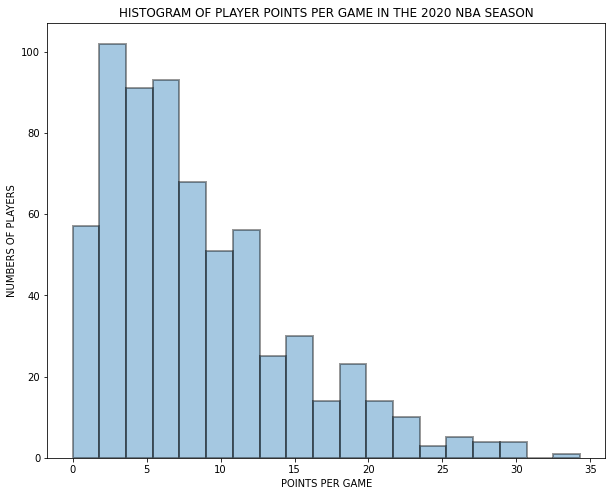

In [25]:
# Making a simple histogram

plt.figure(figsize=(10,8))

sns.distplot(df_2020_new.PTS,    # Checking frequency of the player points
            kde= False,          # Should be False because we want to retain the original frequency ( "kde=True" => it will be the probability)
            hist_kws = dict( edgecolor = 'black', linewidth=2))  

plt.title('HISTOGRAM OF PLAYER POINTS PER GAME IN THE 2020 NBA SEASON')
plt.ylabel('NUMBERS OF PLAYERS')
plt.xlabel('POINTS PER GAME')
plt.show()

From the histogram, we can see: 
- There are about 57 players having between 0 and 1 point.
- There are less than 10 players who had 30 points.